### Problem Statement:



The aim of this project is to analyze and visualize sentiment patterns in social media data, specifically focusing on airline-related tweets. The goal is to gain insights into public opinion and attitudes towards different airlines, identifying common sentiment trends and key factors influencing sentiment.

##### Step 1: Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/hp/OneDrive/Documents/Datasets/Tweets.csv")


In [4]:
# Creatimg DataFrame from the loaded data
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##### Step 2: Data Exploration

In [5]:
# Summary statistics of numerical variables
print(df.describe())



           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [6]:
# Count of unique values in each column
print(df.nunique())


tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64


In [7]:
# Information about DataFrame including data types and non-null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

##### Step 3: Data Cleaning

In [8]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# Drop unnecessary columns
col_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
df.drop(columns=col_drop, inplace=True)

In [10]:
# Convert 'tweet_created' to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])


In [11]:
# Convert text data to lowercase and remove special characters
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '')


In [12]:
# Calculate the mean of the negativereason_confidence column
m_conf = df['negativereason_confidence'].mean()

# Fill missing values with the mean
df['negativereason_confidence'].fillna(m_conf, inplace=True)


In [14]:
# Drop rows with missing values
df.dropna(inplace=True)

##### Step 4: Sentiment Analysis Visualization & Interpretation:

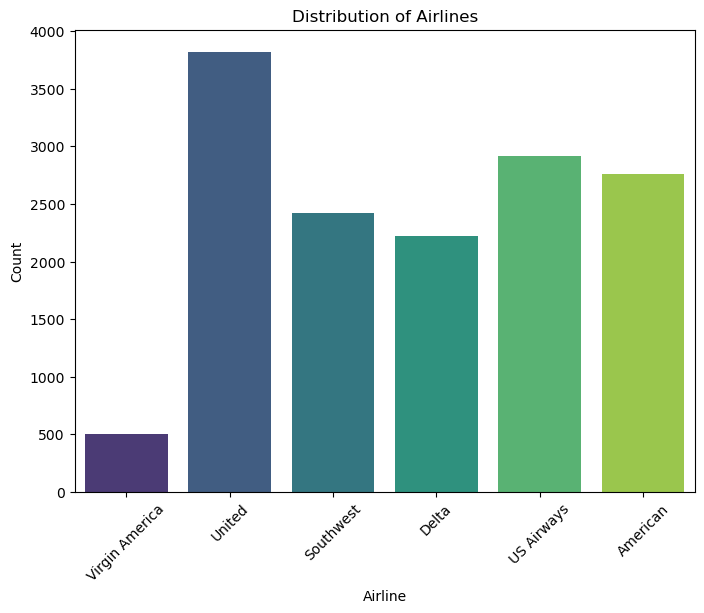

In [51]:
# Distribution of Airlines (Bar chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='airline', palette='viridis')
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


United Airlines has the highest tweet count, indicating it's the most discussed, followed by US Airways and American Airlines with similar but lower counts, and Southwest and Delta with fewer mentions. Virgin America has the fewest tweets, suggesting a smaller Twitter presence.

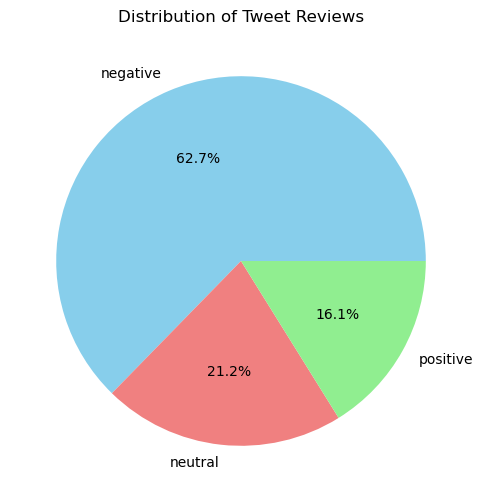

In [52]:

# Distribution of Positive and Negative Tweet Reviews (Pie chart)
plt.figure(figsize=(8, 6))
df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Tweet Reviews')
plt.ylabel('')
plt.show()



The pie chart analysis of the airline tweet dataset shows 62.7% negative, 21.2% neutral, and 16.1% positive reviews, indicating a prevalence of dissatisfaction and a need for improved customer service and public image for airlines.

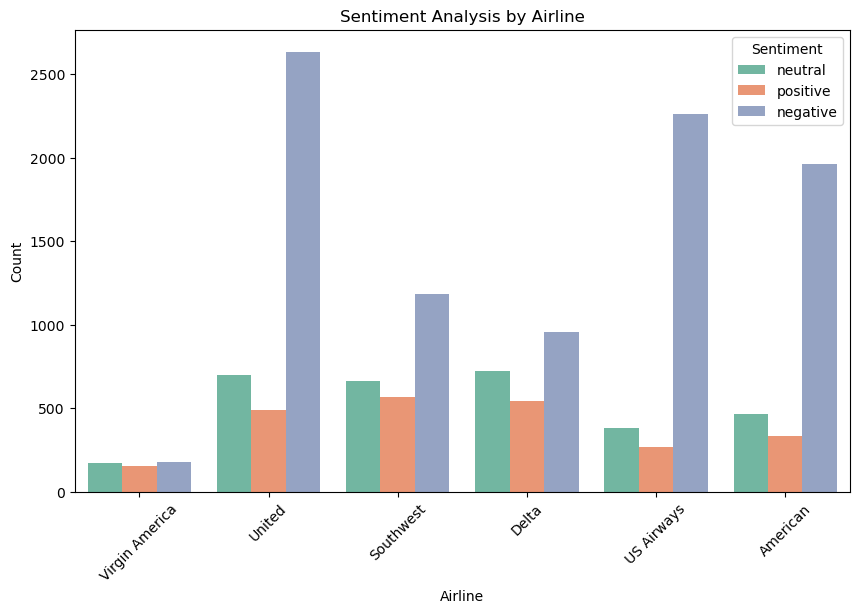

In [67]:
# Sentiment Analysis by Airline
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')
plt.title('Sentiment Analysis by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


United Airlines receives the highest number of negative tweets, indicating widespread dissatisfaction. Southwest Airlines displays a more balanced mix of sentiments, suggesting varied customer experiences. US Airways, American Airlines, and Virgin America also show negative sentiment, highlighting areas for improvement in customer satisfaction across the airline industry.






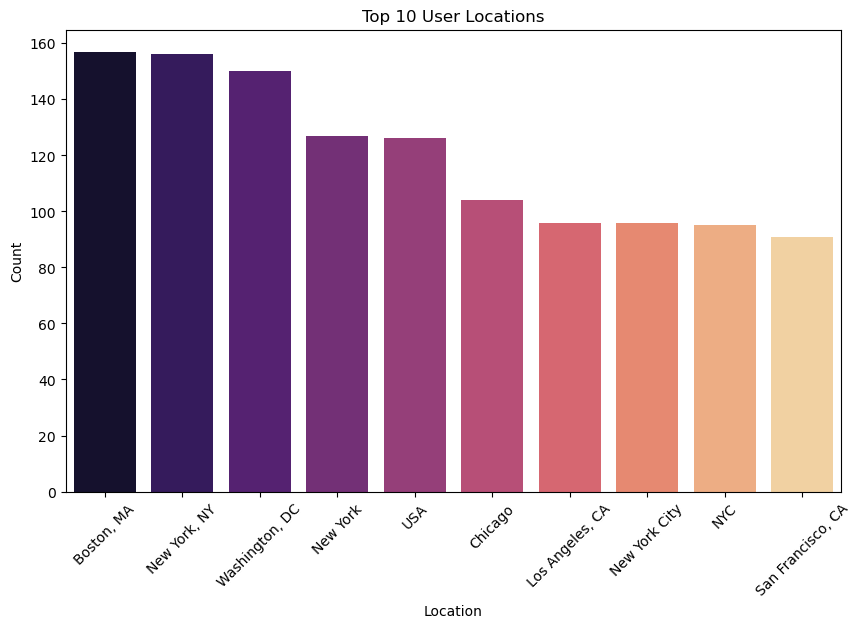

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tweet_location', order=df['tweet_location'].value_counts().iloc[:10].index, palette='magma')
plt.title('Top 10 User Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The bar graph highlights Boston, MA, and New York, NY, as the most active locations for airline-related tweets, suggesting high air travel volume or digital engagement. Washington, D.C., and another category labeled New York also show significant activity. Chicago, IL, has fewer tweets but more than Los Angeles, CA, and San Francisco, CA, possibly reflecting flight-related issues.

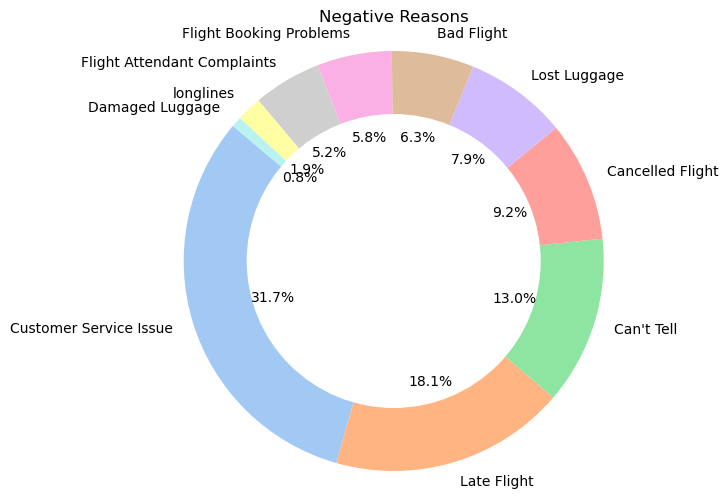

In [53]:
# Calculate value counts for each negative reason
negative_reason_counts = df['negativereason'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(negative_reason_counts, labels=negative_reason_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Negative Reasons')
plt.axis('equal')
plt.show()


The donut chart reveals that Customer Service Issues comprise 31.7% of negative tweets, indicating dissatisfaction with service. Late Flights account for 18.1%, highlighting concerns about flight delays. Flight Attendant Complaints and longlines are less common, each representing less than 1% of negative tweets.

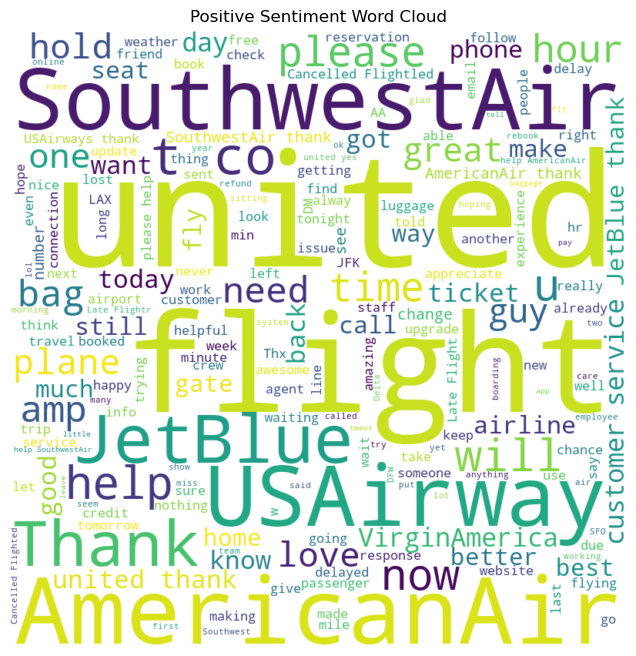

In [74]:
# Word cloud for each sentiment category
from wordcloud import WordCloud

positive_text = ' '.join(data[data['sentiment'] == 'positive']['text'])
negative_text = ' '.join(data[data['sentiment'] == 'negative']['text'])

plt.figure(figsize=(8,8))
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()


The word cloud highlights positive sentiments in airline tweets, with "thank" being prominent, indicating gratitude. Words like "great," "love," and "best" show strong positive reactions to certain aspects of airline services. Airlines like "JetBlue" and "AmericanAir" are frequently mentioned positively, suggesting that despite industry challenges, there are customers sharing positive experiences on social media.

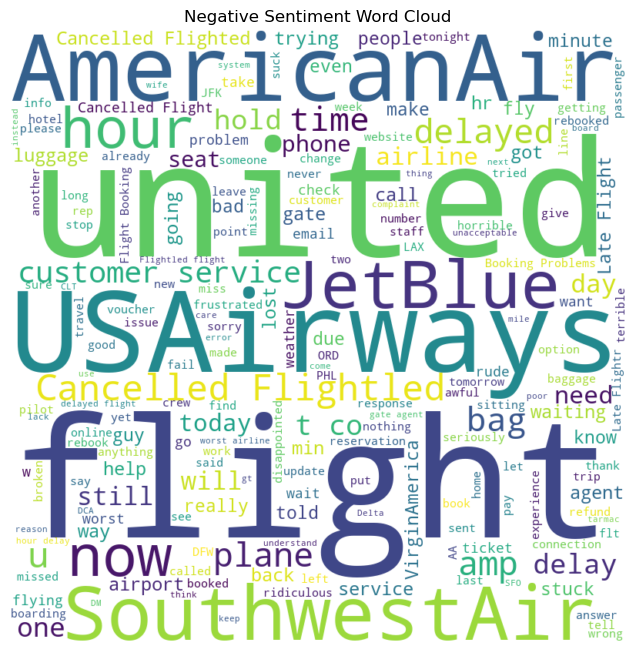

In [64]:
plt.figure(figsize=(8,8))
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


The word cloud reveals that negative sentiments often revolve around terms like "cancelled," "delayed," and "flight," indicating common issues with flight disruptions. Airline names such as "AmericanAir," "United," and "JetBlue" are prominently featured, suggesting frequent mentions in negative contexts due to customer dissatisfaction. This underscores the need for airlines to address service improvements to mitigate negative experiences shared on social media.